N.B., I have abandoned GC calibration because of results below showing that there is no clear relationship between GC and depth.

## Setup

In [1]:
%run setup.ipynb

In [2]:
samples = phase2_ar1.samples
sample_ids = phase2_ar1.sample_ids
len(sample_ids)

1142

In [3]:
genome = phase2_ar1.genome_agamp3

In [4]:
region_vgsc = SeqFeature('2L', 2358158, 2431617)

In [5]:
alignment_stats = zarr.open_group('/kwiat/vector/ag1000g/release/phase2.AR1/alignment_stats/stats.zarr2', mode='r')
alignment_stats

Group(/, 1)
  groups: 1; 2L
  store: DirectoryStore

In [6]:
cache = Cache(backend=zarr.open_group('/kwiat/vector/ag1000g/analysis/20170111-vgsc/cache.zarr2', mode='a'))
cache

## GC calibration - window size?

In [7]:
@cache.memoize
def seq_gc(chrom):
    seq = np.char.lower(np.asarray(genome[chrom]))
    is_gc = (seq == b'g') | (seq == b'c')
    is_not_n = seq != b'n'
    return is_gc, is_not_n
    
    
@cache.memoize
def seq_percent_gc(chrom, window_size):
    is_gc, is_not_n = seq_gc(chrom)
    n_gc = np.convolve(is_gc, np.ones(window_size), mode='same')
    n_not_n = np.convolve(is_not_n, np.ones(window_size), mode='same')
    pc_gc = n_gc / n_not_n
    return pc_gc


In [8]:
@cache.memoize
def dp_gc_percentiles(chrom, sample_id, window_size, percentiles):

    # load depth data
    alignment_stats = zarr.open_group('/kwiat/vector/ag1000g/release/phase2.AR1/alignment_stats/stats.zarr2', mode='r')
    sample_idx = phase2_ar1.sample_ids.index(sample_id)
    dp = alignment_stats[chrom]['reads_all'][:, sample_idx]
    
    # load GC data
    pc_gc = seq_percent_gc(chrom, window_size)

    # compute percentiles
    gc_bins = np.arange(102)
    x = []
    y = []
    for l, u in zip(gc_bins[:-1], gc_bins[1:]):
        loc = (pc_gc >= (l/100)) & (pc_gc < (u/100))
        if np.any(loc):
            s = dp[loc]
            x.append(l)
            y.append(np.percentile(s, percentiles).tolist())
            
    return np.asarray(x), np.asarray(y)
    

In [9]:
def plot_dp_gc_percentiles(chrom, sample_id, window_size, percentiles):
    
    x, y = dp_gc_percentiles(chrom=chrom, sample_id=sample_id, window_size=window_size, percentiles=percentiles)
    
    fig, ax = plt.subplots()
    for i, p in enumerate(percentiles):
        if p == 50:
            linestyle = '-'
            linewidth = 2
        else:
            linestyle = ':'
            linewidth = 1
        ax.plot(x, y[:, i], color='k', lw=linewidth, linestyle=linestyle)
        
    ax.set_title('%s, %s, %s' % (sample_id, chrom, window_size))
    ax.set_xlabel('%GC')
    ax.set_ylabel('DP')
    

[dp_gc_percentiles] cache hit () {'chrom': '2L', 'window_size': 100, 'sample_id': 'AA0044-C', 'percentiles': (10, 25, 50, 75, 90)}


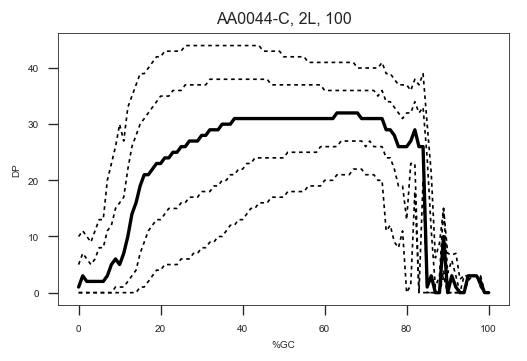

In [10]:
plot_dp_gc_percentiles(chrom='2L', sample_id='AA0044-C', window_size=100, percentiles=(10, 25, 50, 75, 90))

[dp_gc_percentiles] cache hit () {'chrom': '2L', 'window_size': 200, 'sample_id': 'AA0044-C', 'percentiles': (10, 25, 50, 75, 90)}


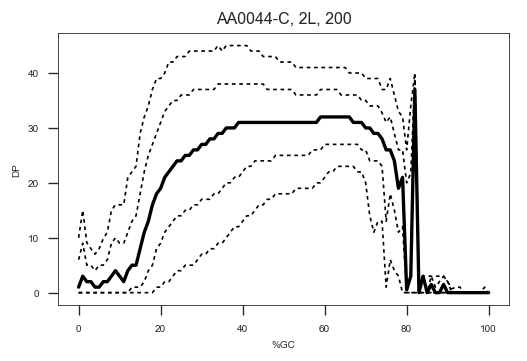

In [11]:
plot_dp_gc_percentiles(chrom='2L', sample_id='AA0044-C', window_size=200, percentiles=(10, 25, 50, 75, 90))

[dp_gc_percentiles] cache hit () {'chrom': '2L', 'window_size': 300, 'sample_id': 'AA0044-C', 'percentiles': (10, 25, 50, 75, 90)}


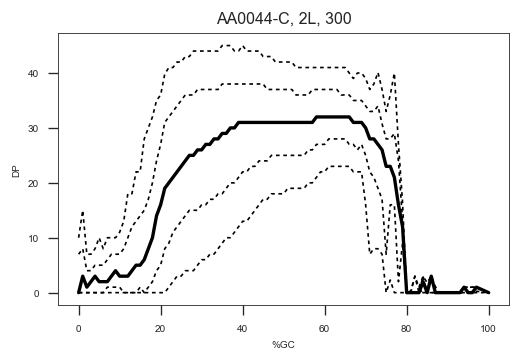

In [12]:
plot_dp_gc_percentiles(chrom='2L', sample_id='AA0044-C', window_size=300, percentiles=(10, 25, 50, 75, 90))

[dp_gc_percentiles] cache hit () {'chrom': '2L', 'window_size': 500, 'sample_id': 'AA0044-C', 'percentiles': (10, 25, 50, 75, 90)}


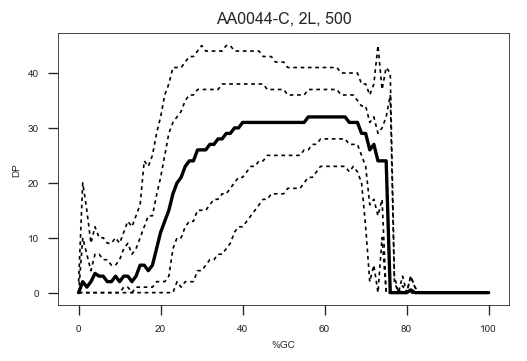

In [13]:
plot_dp_gc_percentiles(chrom='2L', sample_id='AA0044-C', window_size=500, percentiles=(10, 25, 50, 75, 90))

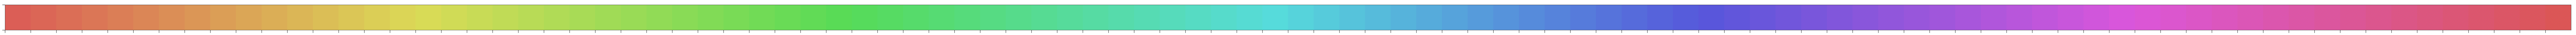

In [38]:
sns.palplot(sns.color_palette('hls', n_colors=100))

In [49]:
plt.text?

In [67]:
pc_gc = seq_percent_gc('2L', 100)
pc_gc

[seq_percent_gc] cache hit ('2L', 100) {}


array([ 0.46      ,  0.45098039,  0.44230769, ...,  0.26415094,
        0.25      ,  0.23529412])

In [76]:
gc_bins = np.percentile(pc_gc[~np.isnan(pc_gc)], np.linspace(0, 100, 100))
gc_bins

array([ 0.  ,  0.22,  0.24,  0.26,  0.27,  0.28,  0.29,  0.29,  0.3 ,
        0.31,  0.31,  0.32,  0.32,  0.33,  0.33,  0.34,  0.34,  0.35,
        0.35,  0.36,  0.36,  0.36,  0.37,  0.37,  0.37,  0.38,  0.38,
        0.38,  0.39,  0.39,  0.39,  0.4 ,  0.4 ,  0.4 ,  0.41,  0.41,
        0.41,  0.42,  0.42,  0.42,  0.42,  0.43,  0.43,  0.43,  0.43,
        0.44,  0.44,  0.44,  0.44,  0.45,  0.45,  0.45,  0.46,  0.46,
        0.46,  0.46,  0.47,  0.47,  0.47,  0.47,  0.48,  0.48,  0.48,
        0.48,  0.49,  0.49,  0.49,  0.49,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
        0.51,  0.51,  0.51,  0.52,  0.52,  0.52,  0.52,  0.53,  0.53,
        0.53,  0.54,  0.54,  0.55,  0.55,  0.55,  0.56,  0.56,  0.57,
        0.57,  0.58,  0.59,  0.59,  0.6 ,  0.61,  0.62,  0.64,  0.66,  1.  ])

In [94]:
#@cache.memoize
def normalized_dp_gc(chrom, sample_id, window_size, gc_bins):

    # load depth data
    alignment_stats = zarr.open_group('/kwiat/vector/ag1000g/release/phase2.AR1/alignment_stats/stats.zarr2', mode='r')
    sample_idx = phase2_ar1.sample_ids.index(sample_id)
    dp = alignment_stats[chrom]['reads_all'][:, sample_idx]
    dpnz = dp > 0

    # load GC data
    pc_gc = seq_percent_gc(chrom, window_size)
    if isinstance(gc_bins, int):
        gc_bins = np.percentile(pc_gc[~np.isnan(pc_gc)], np.linspace(0, 100, gc_bins))
    
    # plotting diagnostics
    fig, axs = plt.subplots(figsize=(len(gc_bins)-1, 1), nrows=1, ncols=len(gc_bins)-1)
    palette = sns.color_palette('hls', n_colors=len(gc_bins)-1)
    
    # normalize
    dpn = np.zeros_like(dp, dtype='f4')
    norm = np.zeros_like(dp, dtype='i4')
    for i, (l, u) in enumerate(zip(gc_bins[:-1], gc_bins[1:])):
        loc = ~np.isnan(pc_gc) & (pc_gc >= l) & (pc_gc < u) & dpnz
        log(l, u, np.count_nonzero(loc))
        if np.any(loc):
            dpl = dp[loc]
            median = np.percentile(dpl, 50)
            mode = np.argmax(np.bincount(dpl))
            
            # plot diagnostics
            h, _ = np.histogram(dpl, bins=np.arange(61))
            axs[i].plot(np.arange(60), h, linestyle='-', lw=1, color=palette[i])
            axs[i].set_yticks([])
            axs[i].set_title('%s-%s' % (l, u))
            axs[i].text(1, 1, '%s, %s\n%s' % (median, mode, np.count_nonzero(loc)), ha='right', va='top', transform=axs[i].transAxes)
            
            norm[loc] = median
            log(l, u, median, mode)
            
    dpn = dp * 2 / norm
    
    return dpn, norm, gc_bins


In [95]:
#normalized_dp_gc.clear()

[seq_percent_gc] cache hit ('2L', 300) {}
0.0 0.1 10338
0.0 0.1 3.0 1


/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater_equal
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less


0.1 0.15 8081
0.1 0.15 6.0 1
0.15 0.2 24196
0.15 0.2 14.0 1
0.2 0.21 13750
0.2 0.21 19.0 14
0.21 0.22 21676
0.21 0.22 22.0 29
0.22 0.23 37770
0.22 0.23 24.0 30
0.23 0.24 62097
0.23 0.24 25.0 29
0.24 0.25 96643
0.24 0.25 26.0 30
0.25 0.26 142948
0.25 0.26 27.0 29
0.26 0.27 209680
0.26 0.27 27.0 30
0.27 0.28 298749
0.27 0.28 28.0 30
0.28 0.29 392693
0.28 0.29 28.0 31
0.29 0.3 500643
0.29 0.3 29.0 34
0.3 0.31 634095
0.3 0.31 29.0 31
0.31 0.32 778244
0.31 0.32 29.0 33
0.32 0.33 912144
0.32 0.33 29.0 33
0.33 0.34 1048608
0.33 0.34 29.0 32
0.34 0.35 1182075
0.34 0.35 30.0 32
0.35 0.36 1289604
0.35 0.36 30.0 32
0.36 0.37 1392712
0.36 0.37 30.0 32
0.37 0.38 1485302
0.37 0.38 30.0 32
0.38 0.39 1559886
0.38 0.39 30.0 31
0.39 0.4 1635352
0.39 0.4 30.0 32
0.4 0.41 1733411
0.4 0.41 30.0 31
0.41 0.42 1843344
0.41 0.42 30.0 31
0.42 0.43 1956551
0.42 0.43 30.0 32
0.43 0.44 2065240
0.43 0.44 30.0 32
0.44 0.45 2171259
0.44 0.45 30.0 32
0.45 0.46 2267748
0.45 0.46 30.0 31
0.46 0.47 2337210
0.46 0.47 30.0

/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in true_divide


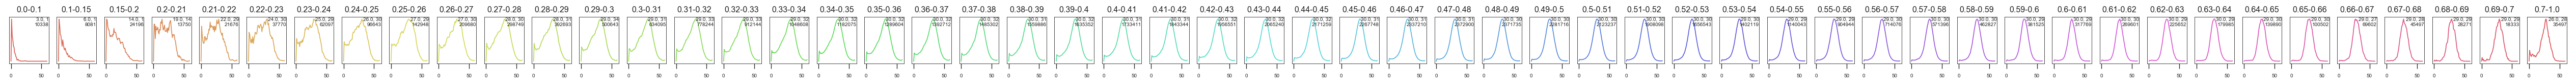

In [97]:
gc_bins = np.array([0, 10, 15] + list(range(20, 70, 1)) + [70, 100]) / 100
dpn, norm, gc_bins = normalized_dp_gc(chrom='2L', sample_id='AA0040-C', window_size=300, gc_bins=gc_bins)

In [ ]:
dpn

In [ ]:
norm

In [ ]:
gc_bins

In [60]:
sample_id = 'AA0044-C'
sample_idx = sample_ids.index(sample_id)
dp = alignment_stats['2L/reads_all'][:, sample_idx]
median = np.median(dp[dp > 0])
median

31.0

In [61]:
mode = np.argmax(np.bincount(dp[dp > 0]))
mode

33

[seq_percent_gc] cache hit ('2L', 100) {}


/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater_equal
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in true_divide


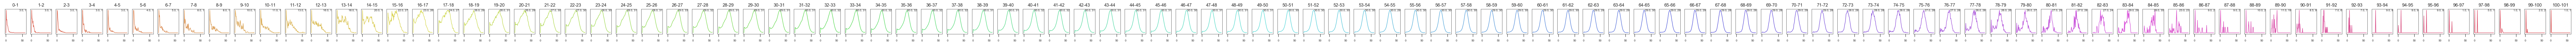

In [64]:
dpn_100, norm_100 = normalized_dp_gc(chrom='2L', sample_id='AA0040-C', window_size=100)

[seq_percent_gc] cache hit ('2L', 300) {}


/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater_equal
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in true_divide


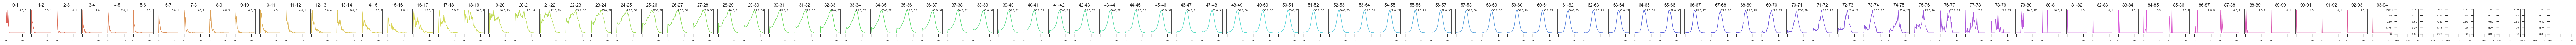

In [65]:
dpn_300, norm_300 = normalized_dp_gc(chrom='2L', sample_id='AA0040-C', window_size=300)

[seq_percent_gc] cache hit () {'chrom': '2L', 'window_size': 100}
[seq_percent_gc] cache hit () {'chrom': '2L', 'window_size': 300}


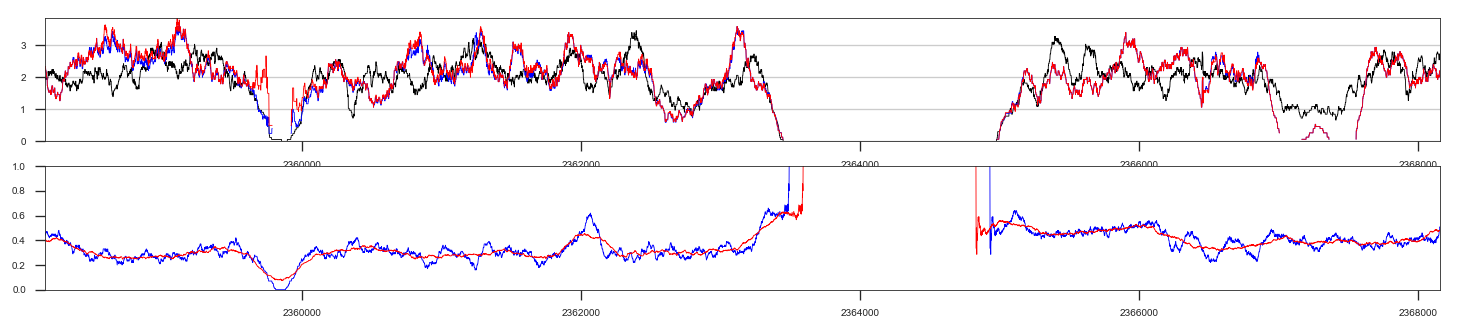

In [66]:
fig = plt.figure(figsize=(15, 3))

feat = SeqFeature('2L', region_vgsc.start, region_vgsc.start + 10000)

ax = fig.add_subplot(2, 1, 1)
x = np.arange(feat.start, feat.end + 1)
y1 = dp[feat.to_slice()] * 2 / mode
y2 = dpn_100[feat.to_slice()]
y3 = dpn_300[feat.to_slice()]

ax.plot(x, y1, lw=.5, color='k')
ax.plot(x, y2, lw=.5, color='b')
ax.plot(x, y3, lw=.5, color='r')
ax.set_yticks([0, 1, 2, 3, 4])
ax.grid(axis='y')
ax.autoscale(axis='both', tight=True)

ax = fig.add_subplot(2, 1, 2)
y1 = seq_percent_gc(chrom='2L', window_size=100)[feat.to_slice()]
ax.plot(x, y1, color='b')
y2 = seq_percent_gc(chrom='2L', window_size=300)[feat.to_slice()]
ax.plot(x, y2, color='r')
ax.autoscale(axis='both', tight=True);

## Sandbox - calibrate GC coverage normalisation

In [4]:
sample_id = 'AA0044-C'
sample_idx = sample_ids.index(sample_id)

In [7]:
chrom = '2L'
seq = np.char.lower(np.asarray(genome[chrom]))
is_gc = (seq == b'g') | (seq == b'c')
is_not_n = seq != b'n'

In [8]:
dp = alignment_stats[chrom]['reads_all'][:, sample_idx]
dp

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [9]:
ngc = np.convolve(is_gc, np.ones(100), mode='same')

In [10]:
nnotn = np.convolve(is_not_n, np.ones(100), mode='same')

In [11]:
pcgc = ngc / nnotn

/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [12]:
np.count_nonzero(np.isnan(pcgc))

781913

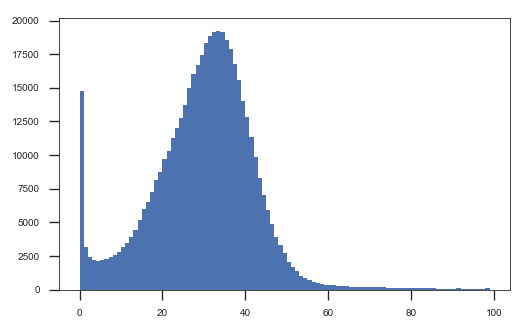

In [13]:
plt.hist(dp[::100], bins=np.arange(0, 100, 1));

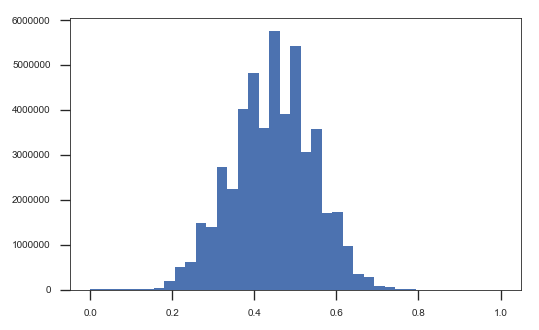

In [14]:
plt.hist(pcgc[~np.isnan(pcgc)], bins=np.linspace(0, 1, 40));

In [15]:
xa = np.arange(80) / 100
percentiles = [10, 25, 50, 75, 90]
yp = collections.defaultdict(list)
gc = []
for x in xa:
    loc = (pcgc >= x) & (pcgc < (x + .01))
    if np.any(loc):
        s = dp[loc]
        gc.append(x)
        for p, y in zip(percentiles, np.percentile(s, percentiles)):
            yp[p].append(y)


/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal
/home/aliman/miniconda3/envs/biipy_20170126_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less


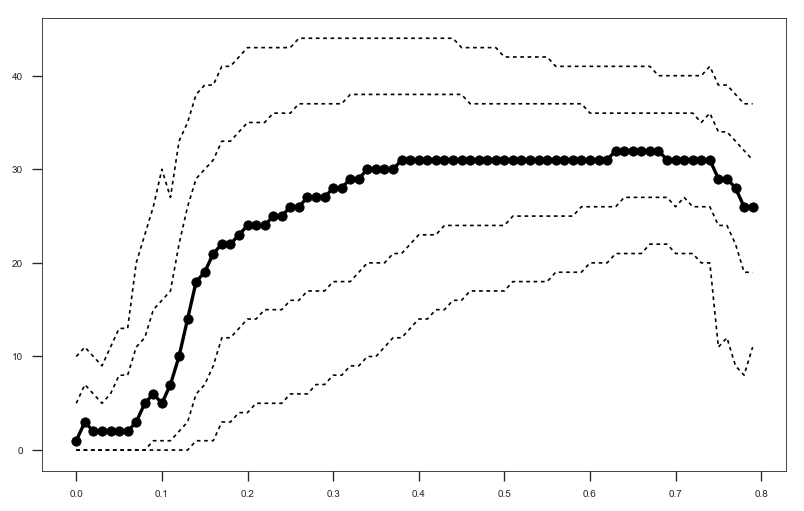

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(gc, yp[50], color='k', lw=2, marker='o')
ax.plot(gc, yp[25], color='k', lw=1, linestyle=':')
ax.plot(gc, yp[75], color='k', lw=1, linestyle=':')
ax.plot(gc, yp[10], color='k', lw=1, linestyle=':')
ax.plot(gc, yp[90], color='k', lw=1, linestyle=':')


In [18]:
m = np.argmax(np.bincount(dp))
m

33

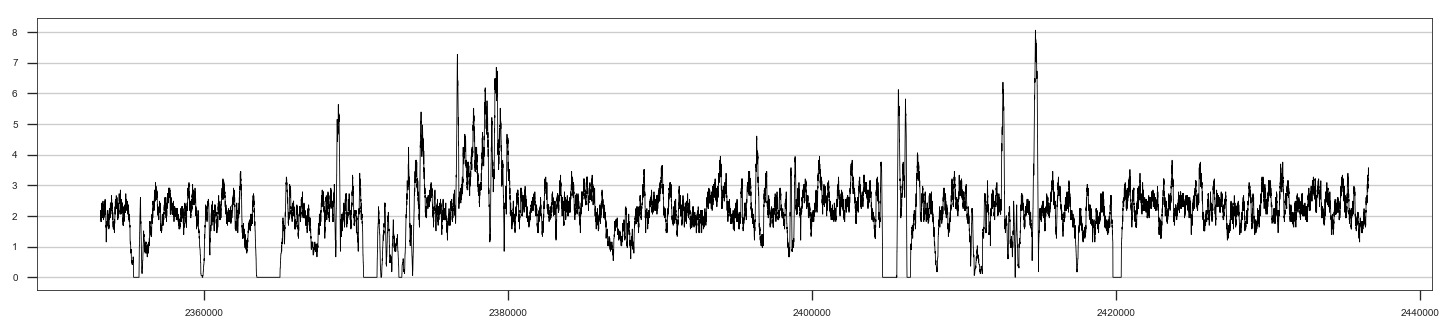

In [21]:
x = np.arange(region_vgsc.start - 5000, region_vgsc.end + 5000 + 1)
y = dp[region_vgsc.start - 1 - 5000:region_vgsc.end + 5000] * 2 / m 
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y, lw=.5, color='k')
ax.grid(axis='y');